In [260]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


### CHAMPIONS 2014-2015

In [261]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=0,
                    batch_size=32, validation_data=(X_test, y_test))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=101,
                    batch_size=32, validation_data=(X_test, y_test))

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4750 - loss: 0.7100 - val_accuracy: 0.3704 - val_loss: 0.6651
Epoch 2/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2847 - loss: 0.6403 - val_accuracy: 0.3704 - val_loss: 0.6465
Epoch 3/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3506 - loss: 0.6328 - val_accuracy: 0.3333 - val_loss: 0.6347
Epoch 4/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2726 - loss: 0.5925 - val_accuracy: 0.3333 - val_loss: 0.6177
Epoch 5/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2822 - loss: 0.6069 - val_accuracy: 0.3333 - val_loss: 0.6067
Epoch 6/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3003 - loss: 0.5728 - val_accuracy: 0.2963 - val_loss: 0.6065
Epoch 7/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2695 - loss: 0.6265 - val_accuracy: 0.3704 - val_loss: 0.5707
Epoch 8/101
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2972 - loss: 0.5898 - val_accuracy: 0.3333 - val_loss:

In [262]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Pérdida en datos de prueba:", loss)
print("Precisión en datos de prueba:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4815 - loss: 0.1989
Pérdida en datos de prueba: 0.1989210695028305
Precisión en datos de prueba: 0.48148149251937866


In [263]:
def predict_match_result(home_team, away_team):
    home_team_encoded = label_encoder.transform([home_team])
    away_team_encoded = label_encoder.transform([away_team])
    match_data = pd.DataFrame(
        {'Home Team': home_team_encoded, 'Away Team': away_team_encoded})
    match_data = match_data.values.reshape(1, -1)
    result_probability = model.predict(match_data)
    return result_probability[0][0]

In [264]:
# Definir una función para determinar al ganador de un partido
def determinar_ganador(home_team, away_team, home_goals, away_goals):
    if home_goals > away_goals:
        return home_team
    elif away_goals > home_goals:
        return away_team
    else:
        return "Empate"


# Iterar sobre cada partido y predecir el resultado
df = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

for index, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    home_goals = row['Home Goals']
    away_goals = row['Away Goals']

    # Calcular la probabilidad de que gane el equipo local
    prob_local = predict_match_result(home_team, away_team)

    # Calcular la probabilidad de que gane el equipo visitante
    prob_visitante = 1 - prob_local

    # Determinar al ganador del partido
    ganador = determinar_ganador(home_team, away_team, home_goals, away_goals)

    print(f"Partido: {home_team} vs {away_team}")
    print(f"Probabilidad de que gane {home_team}: {prob_local:.2%}")
    print(f"Probabilidad de que gane {away_team}: {prob_visitante:.2%}")
    print(f"Ganador: {ganador}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Partido: Real Madrid vs FC Basel
Probabilidad de que gane Real Madrid: 11.78%
Probabilidad de que gane FC Basel: 88.22%
Ganador: Real Madrid

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Partido: Liverpool vs Ludogorets Razgrad
Probabilidad de que gane Liverpool: 31.46%
Probabilidad de que gane Ludogorets Razgrad: 68.54%
Ganador: Liverpool

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Partido: Benfica vs FC Zenit
Probabilidad de que gane Benfica: 53.99%
Probabilidad de que gane FC Zenit: 46.01%
Ganador: FC Zenit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Partido: AS Monaco vs Bayer Leverkusen
Probabilidad de que gane AS Monaco: 1.24%
Probabilidad de que gane Bayer Leverkusen: 98.76%
Ganador: AS Monaco

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Partido: Galatasaray vs Anderlecht
Probabilidad de que gane Galatasaray: 79.33%
Probabilidad de que gane Anderlecht: 20.67%
Ganador: Empate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Partido: Olympiacos vs Atletico de Madrid
Probabil

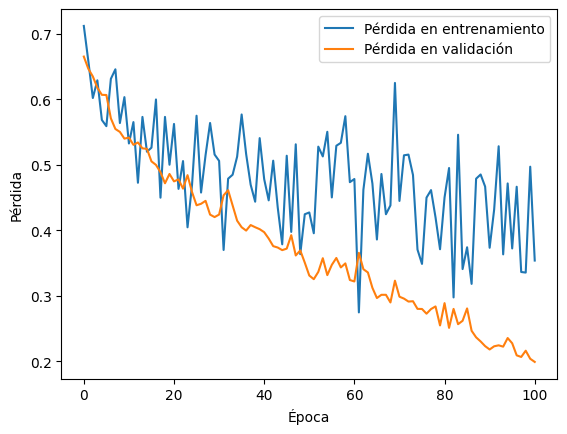

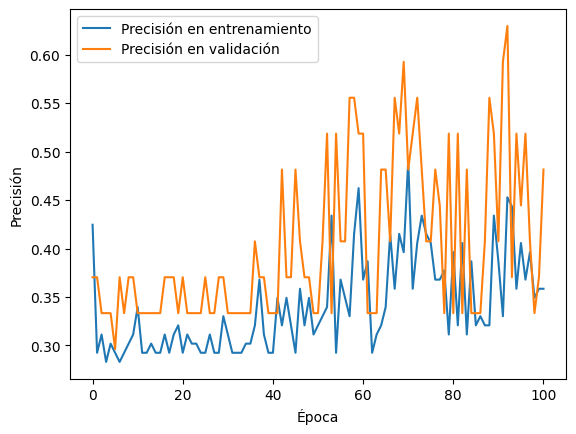

In [265]:

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### CHAMPIONS 2015-2016

Epoch 1/100


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4260 - loss: 0.7121 - val_accuracy: 0.3125 - val_loss: 0.6103
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3083 - loss: 0.6888 - val_accuracy: 0.2188 - val_loss: 0.5986
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2927 - loss: 0.6755 - val_accuracy: 0.2500 - val_loss: 0.5840
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2198 - loss: 0.6879 - val_accuracy: 0.1875 - val_loss: 0.5819
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1771 - loss: 0.6790 - val_accuracy: 0.1875 - val_loss: 0.5823
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1344 - loss: 0.6526 - val_accuracy: 0.1875 - val_loss: 0.5785
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1469 - loss: 0.6739 - val_accuracy: 0.1875 - val_loss: 0.5709
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1552 - loss: 0.6438 - val_accuracy: 0.1875 - val_loss: 0.5823
Epoc

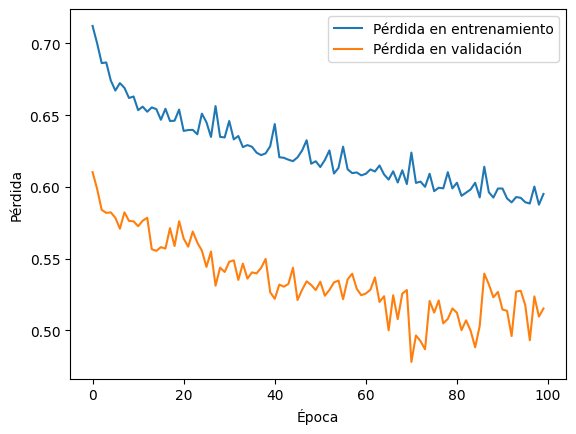

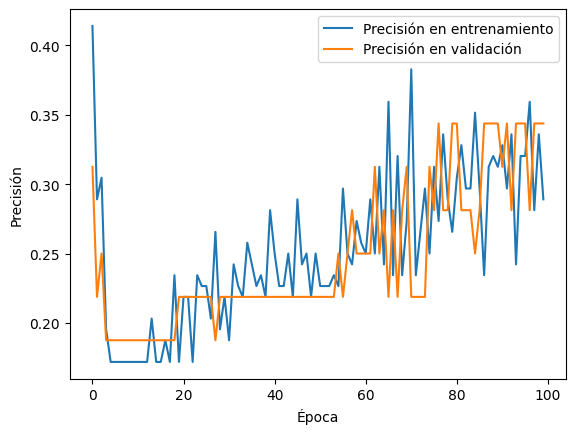

In [266]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


class ChampionsLeaguePredictor:
    def __init__(self):
        self.model = None
        self.label_encoder = LabelEncoder()

    def load_data(self, file_path):
        data = pd.read_csv(file_path)

        # Codificar los nombres de los equipos
        data['Home Team'] = self.label_encoder.fit_transform(data['Home Team'])
        data['Away Team'] = self.label_encoder.transform(data['Away Team'])

        # Crear una columna para representar el resultado del partido
        data['Result'] = data['Home Goals'] - data['Away Goals']
        data['Result'] = data['Result'].apply(
            lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

        # Dividir los datos en características (X) y variable objetivo (y)
        X = data[['Home Team', 'Away Team']]
        y = data['Result']

        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, X_test, y_test, epochs=100):
        # Definir el modelo de red neuronal
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compilar el modelo
        self.model.compile(optimizer='sgd', loss='binary_crossentropy',
                           metrics=['accuracy'])

        # Entrenar el modelo y guardar el historial del entrenamiento en una variable
        history = self.model.fit(X_train, y_train, epochs=epochs,
                                 batch_size=32, validation_data=(X_test, y_test))

        return history

    def predict_match_result(self, home_team, away_team):
        home_team_encoded = self.label_encoder.transform([home_team])
        away_team_encoded = self.label_encoder.transform([away_team])
        match_data = pd.DataFrame(
            {'Home Team': home_team_encoded, 'Away Team': away_team_encoded})
        match_data = match_data.values.reshape(1, -1)
        result_probability = self.model.predict(match_data)
        return result_probability[0][0]

    def determine_winner(self, home_team, away_team, home_goals, away_goals):
        if home_goals > away_goals:
            return home_team
        elif away_goals > home_goals:
            return away_team
        else:
            return "Empate"

    def plot_training_history(self, history):
        plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
        plt.plot(history.history['val_loss'], label='Pérdida en validación')
        plt.xlabel('Época')
        plt.ylabel('Pérdida')
        plt.legend()
        plt.show()

        plt.plot(history.history['accuracy'],
                 label='Precisión en entrenamiento')
        plt.plot(history.history['val_accuracy'],
                 label='Precisión en validación')
        plt.xlabel('Época')
        plt.ylabel('Precisión')
        plt.legend()
        plt.show()


# Ejemplo de uso:
predictor = ChampionsLeaguePredictor()
X_train, X_test, y_train, y_test = predictor.load_data(
    'Datos_Limpios/UCL2015-2016.csv')
history = predictor.train_model(X_train, y_train, X_test, y_test, epochs=100)
predictor.plot_training_history(history)

# predice la champions partido por partido

df = pd.read_csv('Datos_Limpios/UCL2015-2016.csv')

for index, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    home_goals = row['Home Goals']
    away_goals = row['Away Goals']

    # Calcular la probabilidad de que gane el equipo local
    prob_local = predictor.predict_match_result(home_team, away_team)

    # Calcular la probabilidad de que gane el equipo visitante
    prob_visitante = 1 - prob_local

    # Determinar al ganador del partido
    ganador = predictor.determine_winner(
        home_team, away_team, home_goals, away_goals)

    print(f"Partido: {home_team} vs {away_team}")
    print(f"Probabilidad de que gane {home_team}: {prob_local:.2%}")
    print(f"Probabilidad de que gane {away_team}: {prob_visitante:.2%}")
    print(f"Ganador: {ganador}")
    print()